# Problema 1

Implementar en Python una función que grafique el campo de direcciones asociado a una ecuación diferencial de primer orden  

$$\frac{dy}{dx} = f(x,y). \tag{1}$$

Como parámetros su algoritmo debe recibir la función $f$, los límites $x_{\min}, x_{\max}, y_{\min}, y_{\max}$ de la ventana que desea graficar, y parámetros $xstep$ y $ystep$ para indicar la separación en la que quiere subdividir su grid de puntos sobre los ejes $x$ y $y$, respectivamente. Puede añadir parámetros adicionales que usted desee.  

También debe incluir algún parámetro que permita graficar entre el campo $F$ asociado a la ecuación (1), o el campo unitario $N$ equivalente.  

Para la salida, su función debe devolver una figura con el campo de direcciones requerido. Si usted lo desea, puede incorporar que su función grafique también las líneas de flujo o curvas solución de la ecuación diferencial.  

**Sugerencia:** Apoyarse de las funciones `numpy.linspace` para crear los rangos y subdivisiones en los ejes $x$ y $y$. Usar la función `numpy.meshgrid` para generar la rejilla de puntos a graficar. Usar `matplotlib.pyplot.quiver` para construir el campo vectorial requerido. Puede usar la función `matplotlib.pyplot.streamplot` para graficar las líneas de flujo.  

Se sugiere implementar la construcción del campo a través de una función auxiliar:  

```python
def F(x, y):
    return (expr1, expr2)
````

donde `expr1` y `expr2` corresponden a las componentes del campo $F(x,y)$ que desea graficar.

Ilustrar los resultados de su función graficando dos campos vectoriales de su elección.


In [76]:
import numpy as np
import matplotlib.pyplot as plt

In [77]:
def buildField(f):
    """Devuelve la función F(x,y) = (1, f(x,y)) asociada a y' = f(x,y)."""
    def F(x, y):
        return 1.0, f(x, y)
    return F

In [78]:
def normalizeField(U, V, eps=1e-12):
    """Normaliza (U,V) a longitud 1 usando ||F|| = sqrt(1 + f^2)."""
    N = np.sqrt(U**2 + V**2) + eps
    return U / N, V / N

In [ ]:
def plotDirectionField(
    f,
    xmin, xmax, ymin, ymax,
    xstep=0.5, ystep=0.5,
    useUnitField=True,
    showStream=False,
    streamDensity=1.2,
    quiverScale=None,
    scale=1.0,
    figsize=(7, 5),
    title=None
):
    """
    Grafica el campo de direcciones para y' = f(x,y).

    Parámetros:
      f: callable f(x,y)
      [x|y]min, [x|y]max: límites de la ventana
      xstep, ystep: separación del grid en ejes x e y
      useUnitField: si True, grafica el campo unitario N; si False, el campo F puro
      showStream: si True, agrega líneas de flujo (streamlines)
      streamDensity: densidad para streamplot
      quiverScale: escala de flechas para quiver (None deja auto)
      scale: factor multiplicador adicional para las flechas
      figsize: tamaño de la figura
      title: título opcional
    """
    # 1) Grid uniforme usando linspace
    nx = int((xmax - xmin) / xstep) + 1
    ny = int((ymax - ymin) / ystep) + 1
    xs = np.linspace(xmin, xmax, nx)
    ys = np.linspace(ymin, ymax, ny)
    X, Y = np.meshgrid(xs, ys)

    # 2) Campo asociado F(x,y) = (1, f)
    f_vec = np.vectorize(f)
    U = np.ones_like(X, dtype=float)
    V = f_vec(X, Y).astype(float)

    # 3) Normalización (opcional)
    Uplot, Vplot = (normalizeField(U, V) if useUnitField else (U, V))

    # 4) Aplicar factor de escala adicional
    Uplot, Vplot = scale * Uplot, scale * Vplot

    # 5) Gráfica
    fig, ax = plt.subplots(figsize=figsize)
    ax.quiver(X, Y, Uplot, Vplot, pivot='mid', scale=quiverScale)

    # 6) Líneas de flujo opcionales
    if showStream:
        ax.streamplot(
            X, Y, Uplot, Vplot,
            density=streamDensity, arrowsize=1.2, linewidth=1.0
        )

    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    if title:
        ax.set_title(title + (' (unitario)' if useUnitField else ' (no normalizado)'))
    ax.grid(True, alpha=0.25)
    fig.tight_layout()
    return fig, ax

In [80]:
def f1(x, y):
    # Ejemplo 1: y' = x*y
    return x * y

def f2(x, y):
    # Ejemplo 2: y' = -x*y
    return -x * y

def f3(x, y):
    # Ejemplo 3: y' = x - y
    return x - y

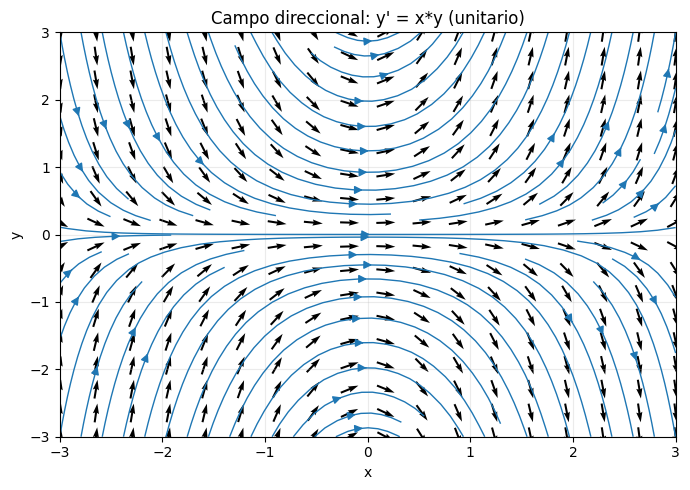

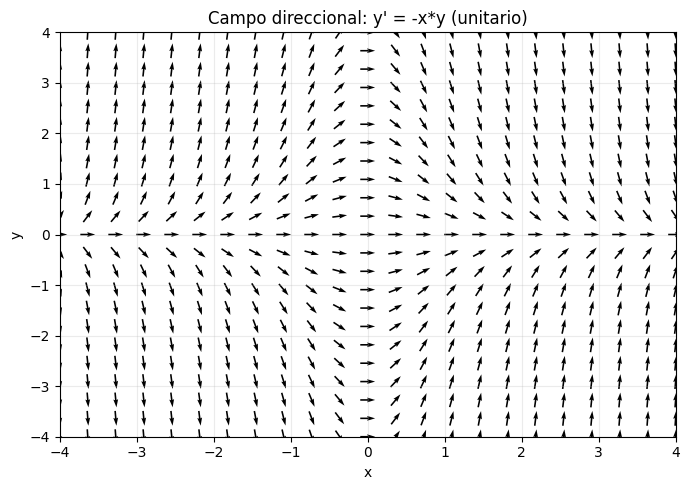

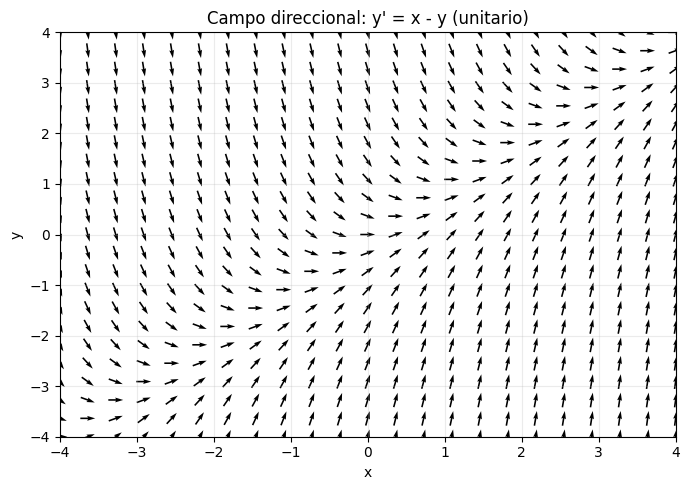

In [81]:
plotDirectionField(
    f1, xmin=-3, xmax=3, ymin=-3, ymax=3,
    xstep=0.35, ystep=0.35,
    useUnitField=True, showStream=True,
    streamDensity=1.0, scale=0.8,
    title="Campo direccional: y' = x*y"
)

plotDirectionField(
    f2, xmin=-4, xmax=4, ymin=-4, ymax=4,
    xstep=0.35, ystep=0.35,
    useUnitField=True, showStream=False,
    streamDensity=1.0, scale=0.8,
    title="Campo direccional: y' = -x*y"
)

plotDirectionField(
    f3, xmin=-4, xmax=4, ymin=-4, ymax=4,
    xstep=0.35, ystep=0.35,
    useUnitField=True, showStream=False,
    streamDensity=1.0, scale=0.8,
    title="Campo direccional: y' = x - y"
)

plt.show()

# Problema 2

Para las siguientes ecuaciones diferenciales ordinarias, utilizar métodos cualitativos para esbozar las soluciones de la EDO.  
Luego, resolver cada EDO con los métodos aprendidos en sus cursos pasados, para determinar una expresión de la solución general de cada EDO. Comparar la solución obtenida contra su solución esbozada. Discutir si coinciden las curvas solución.  

1. $y' = -xy$  

2. $y' = xy$  

3. $x\,dx + y\,dy = 0$  

4. $y\,dx + x\,dy = 0$  

5. $\dfrac{dy}{dx} = y^2 - y$  
